In [3]:
from tbparse import SummaryReader
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
sns.set_palette("muted")

In [4]:
df_10 = SummaryReader("/home/isaacp/repos/EvMatsim/contribs/ev/evsim/gradient_flow_matching/utah_flow_results/0423153613_nclusters_10_utahnetwork/logs").scalars
df_50 = SummaryReader("/home/isaacp/repos/EvMatsim/contribs/ev/evsim/gradient_flow_matching/utah_flow_results/0423154624_nclusters_50_utahnetwork/logs").scalars
df_100 = SummaryReader("/home/isaacp/repos/EvMatsim/contribs/ev/evsim/gradient_flow_matching/utah_flow_results/0423155704_nclusters_100_utahnetwork/logs").scalars
df_200 = SummaryReader("/home/isaacp/repos/EvMatsim/contribs/ev/evsim/gradient_flow_matching/utah_flow_results/0423161247_nclusters_200_utahnetwork/logs").scalars
df_500 = SummaryReader("/home/isaacp/repos/EvMatsim/contribs/ev/evsim/gradient_flow_matching/utah_flow_results/0425144015_nclusters_500_utahnetwork/logs").scalars

In [5]:
df_10.head()

,step,tag,value
0,0,Logs/mad,1000.811646
1,1000,Logs/mad,997.258789
2,2000,Logs/mad,993.913513
3,3000,Logs/mad,990.716248
4,4000,Logs/mad,987.645081


In [6]:
df_10['tag'].unique()

array(['Logs/mad', 'Loss/mse'], dtype=object)

In [7]:
df_dict = {"10 Clusters":df_10, "50 clusters": df_50, "100 clusters":df_100, "200 clusters": df_200, "500 clusters":df_500}

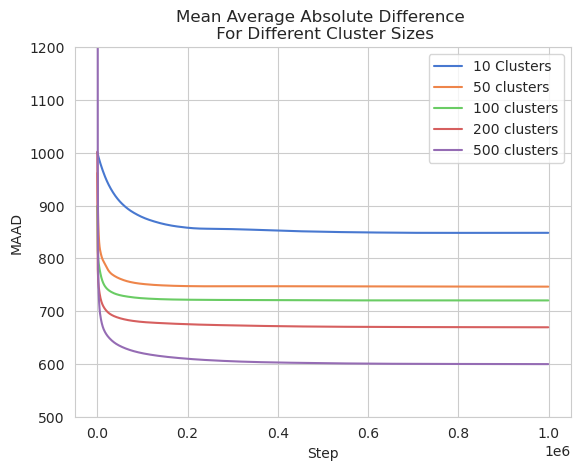

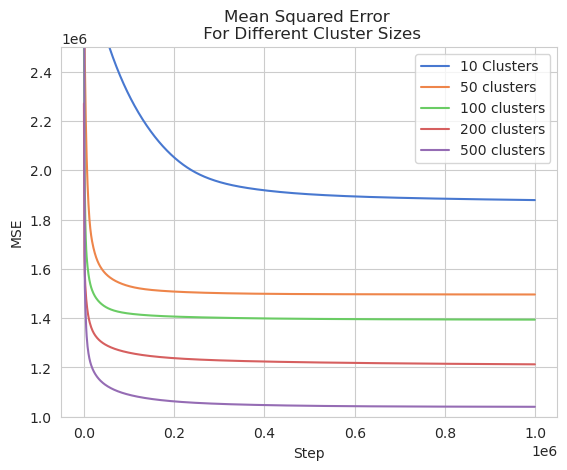

In [14]:
for key, df in df_dict.items():
    mad_loss = df[df['tag'] == 'Logs/mad']
    plt.plot(mad_loss['step'], mad_loss['value'], label=key)

plt.legend()
plt.title("Mean Average Absolute Difference \n For Different Cluster Sizes")
plt.xlabel("Step")
plt.ylabel("MAAD")
plt.ylim(500,1200)
plt.show()

for key, df in df_dict.items():
    mad_loss = df[df['tag'] == 'Loss/mse']
    plt.plot(mad_loss['step'], mad_loss['value'], label=key)
    
plt.legend()
plt.title("Mean Squared Error \n For Different Cluster Sizes")
plt.xlabel("Step")
plt.ylabel("MSE")
plt.ylim(1e6, 2.5e6)
plt.show()